In [0]:
%sql
SELECT current_catalog(), current_schema()

current_catalog(),current_schema()
workspace,default


In [0]:
# Read the flights data:
flights_df = spark.read.table("flights")

In [0]:
# Print the schema
flights_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- year: long (nullable = true)
 |-- month: long (nullable = true)
 |-- day: long (nullable = true)
 |-- dep_time: double (nullable = true)
 |-- sched_dep_time: long (nullable = true)
 |-- dep_delay: double (nullable = true)
 |-- arr_time: double (nullable = true)
 |-- sched_arr_time: long (nullable = true)
 |-- arr_delay: double (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight: long (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: double (nullable = true)
 |-- distance: long (nullable = true)
 |-- hour: long (nullable = true)
 |-- minute: long (nullable = true)
 |-- time_hour: timestamp (nullable = true)
 |-- name: string (nullable = true)



In [0]:
# View the data
display(flights_df.limit(10))

id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00.000Z,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00.000Z,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00.000Z,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00.000Z,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00.000Z,Delta Air Lines Inc.
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T05:00:00.000Z,United Air Lines Inc.
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T06:00:00.000Z,JetBlue Airways
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01T06:00:00.000Z,ExpressJet Airlines Inc.
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01T06:00:00.000Z,JetBlue Airways
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01T06:00:00.000Z,American Airlines Inc.


In [0]:
print(type(flights_df))

<class 'pyspark.sql.connect.dataframe.DataFrame'>


In [0]:
# Printing the columns
print(flights_df.columns)

['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour', 'name']


In [0]:
initial_count = flights_df.count()

print(f"Source data has {initial_count} records")

Source data has 336776 records


In [0]:
# Creating a temporary view in Spark SQL
flights_df \
    .selectExpr(
        "id as ID",
        "year as Year",
        "month as Month",
        "day AS Day ",
        "CAST(dep_time AS INTEGER) as DepTime",
        "sched_dep_time AS SchedDepTime",
        "dep_delay AS DepDelay",
        "CAST(arr_time AS INTEGER) as ArrTime",
        "sched_arr_time AS SchedArrTime",
        "arr_delay AS ArrDelay",
        "carrier as Carrier",
        "flight as Flight",
        "tailnum as TailNum",
        "origin as Origin",
        "dest as Dest",
        "air_time AS AirTime",
        "distance AS Distance",
    ) \
    .createOrReplaceTempView("flights_temp")

In [0]:
# Using Spark SQL to count null values:
invalid_counts = spark.sql("""
    SELECT
        COUNT_IF(Year IS NULL) AS NullYearCount,
        COUNT_IF(Month IS NULL) AS NullMonthCount,
        COUNT_IF(Day IS NULL) AS NullDayCount,
        COUNT_IF(DepTime IS NULL) AS NullDepTimeCount,
        COUNT_IF(SchedDepTime IS NULL) AS NullSchedDepTimeCount,
        COUNT_IF(DepDelay IS NULL) AS NullDepDelayCount,
        COUNT_IF(ArrTime IS NULL) AS NullArrTimeCount,
        COUNT_IF(SchedArrTime IS NULL) AS NullSchedArrTimeCount,
        COUNT_IF(ArrDelay IS NULL) AS NullArrDelayCount,
        COUNT_IF(Carrier IS NULL) AS NullCarrierCount,
        COUNT_IF(Flight IS NULL) AS NullFlightCount,
        COUNT_IF(TailNum IS NULL) AS NullTailNumCount,
        COUNT_IF(Origin IS NULL) AS NullOriginCount,
        COUNT_IF(Dest IS NULL) AS NullDestCount,
        COUNT_IF(AirTime IS NULL) AS NullAirTimeCount,
        COUNT_IF(Distance IS NULL) AS NullDistanceCount
    FROM flights_temp
""")

display(invalid_counts)

NullYearCount,NullMonthCount,NullDayCount,NullDepTimeCount,NullSchedDepTimeCount,NullDepDelayCount,NullArrTimeCount,NullSchedArrTimeCount,NullArrDelayCount,NullCarrierCount,NullFlightCount,NullTailNumCount,NullOriginCount,NullDestCount,NullAirTimeCount,NullDistanceCount
0,0,0,8255,0,8255,8713,0,9430,0,0,2512,0,0,9430,0


## Comparing Spark SQL statements to DataFrame API Operations:
---

Spark SQL DataFrame queries and their equivalent operations in the DataFrame API are evaluated to the same physical plans, let's prove this.

In [0]:
# This is the equivalent of the preceding Spark SQL query using the DataFrame API 
from pyspark.sql.functions import col, sum, when

# Make sure to work with the same temporary view that the SQL is using
flights_temp_df = spark.table("flights_temp")

# Use DataFrame API to count null values
invalid_counts_df = flights_temp_df.select(
  sum(when(col("Year").isNull(), 1).otherwise(0)).alias("NullYearCount"),
  sum(when(col("Month").isNull(), 1).otherwise(0)).alias("NullMonthCount"),
  sum(when(col("Day").isNull(), 1).otherwise(0)).alias("NullDayCount"),
  sum(when(col("DepTime").isNull(), 1).otherwise(0)).alias("NullDepTimeCount"),
  sum(when(col("SchedDepTime").isNull(), 1).otherwise(0)).alias("NullSchedDepTimeCount"),
  sum(when(col("DepDelay").isNull(), 1).otherwise(0)).alias("NullDepDelayCount"),
  sum(when(col("ArrTime").isNull(), 1).otherwise(0)).alias("NullArrTimeCount"),
  sum(when(col("SchedArrTime").isNull(), 1).otherwise(0)).alias("NullSchedArrTimeCount"),
  sum(when(col("ArrDelay").isNull(), 1).otherwise(0)).alias("NullArrDelayCount"),
  sum(when(col("Carrier").isNull(), 1).otherwise(0)).alias("NullCarrierCount"),
  sum(when(col("Flight").isNull(), 1).otherwise(0)).alias("NullFlightCount"),
  sum(when(col("TailNum").isNull(), 1).otherwise(0)).alias("NullTailNumCount"),
  sum(when(col("Origin").isNull(), 1).otherwise(0)).alias("NullOriginCount"),
  sum(when(col("Dest").isNull(), 1).otherwise(0)).alias("NullDestCount"),
  sum(when(col("AirTime").isNull(), 1).otherwise(0)).alias("NullAirTimeCount"),
  sum(when(col("Distance").isNull(), 1).otherwise(0)).alias("NullDistanceCount")
)

display(invalid_counts_df)

NullYearCount,NullMonthCount,NullDayCount,NullDepTimeCount,NullSchedDepTimeCount,NullDepDelayCount,NullArrTimeCount,NullSchedArrTimeCount,NullArrDelayCount,NullCarrierCount,NullFlightCount,NullTailNumCount,NullOriginCount,NullDestCount,NullAirTimeCount,NullDistanceCount
0,0,0,8255,0,8255,8713,0,9430,0,0,2512,0,0,9430,0


In [0]:
# Get the query plan for the Spark SQL
sql_plan = invalid_counts.explain()
print(sql_plan)

# Get the query plan for the DataFrame
df_plan = invalid_counts_df.explain()
print(df_plan)

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- == Initial Plan ==
   ColumnarToRow
   +- PhotonResultStage
      +- PhotonAgg(keys=[], functions=[finalmerge_count(merge count#12070L) AS count(if (isnotnull(Year#11035L)) null else isnull(Year#11035L))#12037L, finalmerge_count(merge count#12072L) AS count(if (isnotnull(Month#11036L)) null else isnull(Month#11036L))#12038L, finalmerge_count(merge count#12074L) AS count(if (isnotnull(Day#11037L)) null else isnull(Day#11037L))#12039L, finalmerge_count(merge count#12076L) AS count(if (isnotnull(DepTime#11038)) null else isnull(DepTime#11038))#12040L, finalmerge_count(merge count#12078L) AS count(if (isnotnull(SchedDepTime#11039L)) null else isnull(SchedDepTime#11039L))#12041L, finalmerge_count(merge count#12080L) AS count(if (isnotnull(DepDelay#11040)) null else isnull(DepDelay#11040))#12042L, finalmerge_count(merge count#12082L) AS count(if (isnotnull(ArrTime#11041)) null else isnull(ArrTime#11041))#12043L, finalmerge_count(merg

In [0]:
# Proof that they are equal
sql_plan == df_plan

True

## Using the Databricks AI Assistant
---

The Databricks AI Assistant feature can be used to generate code or to visualize metrics from DataFrames, from the code cell below click on the **generate link** and enter:
```
generate a bar chart showing nulls for each column in the flights_temp_df dataframe
```

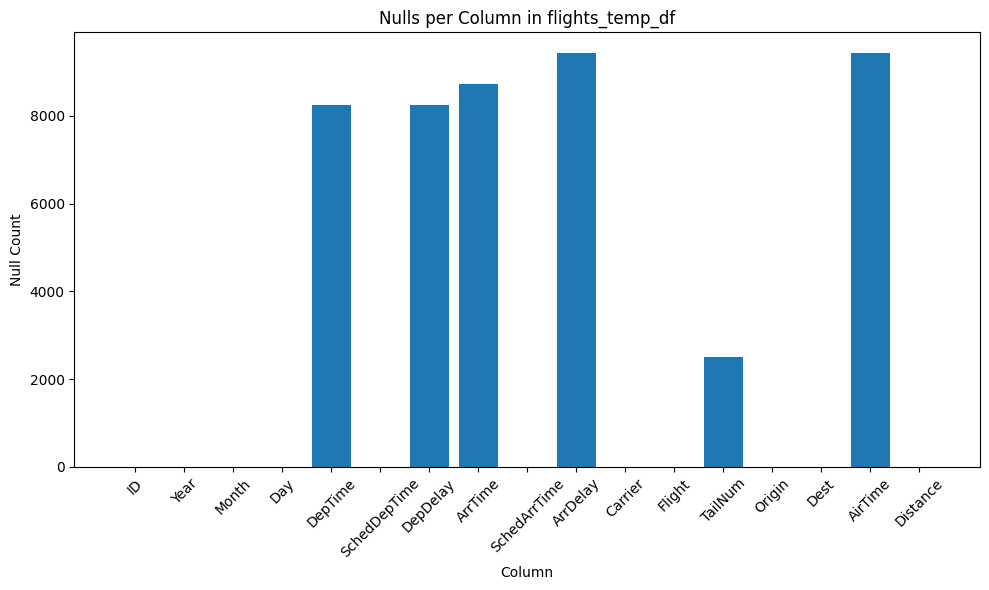

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

null_counts = flights_temp_df.select(
    [F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in flights_temp_df.columns]
).toPandas().T
null_counts.columns = ['null_count']
null_counts = null_counts.reset_index().rename(columns={'index': 'column'})

plt.figure(figsize=(10,6))
plt.bar(null_counts['column'], null_counts['null_count'])
plt.xlabel('Column')
plt.ylabel('Null Count')
plt.title('Nulls per Column in flights_temp_df')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Cleaning
---

In [0]:
display(flights_temp_df.limit(10))

ID,Year,Month,Day,DepTime,SchedDepTime,DepDelay,ArrTime,SchedArrTime,ArrDelay,Carrier,Flight,TailNum,Origin,Dest,AirTime,Distance
0,2013,1,1,517,515,2.0,830,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400
1,2013,1,1,533,529,4.0,850,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416
2,2013,1,1,542,540,2.0,923,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089
3,2013,1,1,544,545,-1.0,1004,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576
4,2013,1,1,554,600,-6.0,812,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762
5,2013,1,1,554,558,-4.0,740,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719
6,2013,1,1,555,600,-5.0,913,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065
7,2013,1,1,557,600,-3.0,709,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229
8,2013,1,1,557,600,-3.0,838,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944
9,2013,1,1,558,600,-2.0,753,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733


In [0]:
# Dropping rows where any specified columns are null with `na.drop`
non_null_flights_temp_df = flights_temp_df.na.drop(
    how="any",
    subset=["DepTime"]
)

In [0]:
from pyspark.sql.functions import col

# Removing rows with invalid values for "DepTime", "DepDelay" and "ArrTime" columns
flights_with_valid_data = non_null_flights_temp_df.filter(
    col("DepTime").cast("integer").isNotNull() &
    col("DepDelay").cast("integer").isNotNull() &
    col("ArrTime").cast("integer").isNotNull()
)

In [0]:
# Now that we know that the columns above contain integer values only, we can cast them to integers
clean_flights_df = flights_with_valid_data \
    .withColumn("DepTime", col("DepTime").cast("integer")) \
    .withColumn("DepDelay", col("DepDelay").cast("integer"))

clean_flights_df.printSchema()

root
 |-- ID: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- Day: long (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- SchedDepTime: long (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- SchedArrTime: long (nullable = true)
 |-- ArrDelay: double (nullable = true)
 |-- Carrier: string (nullable = true)
 |-- Flight: long (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- Distance: long (nullable = true)



## Data Enrichment
---

Creating useful information using available columns